## Coba datanya di split 80 20, abis itu cross validatio

In [52]:
# Regular EDA (exploration data analysis) and plotting libraries
import numpy as np
import pandas as pd
%matplotlib inline

In [53]:
# use pandas to load data into a DataFrame
df = pd.read_csv("winequality-red.csv", delimiter=';')
df.shape # (rows, columns)

(1599, 12)

In [54]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [55]:
target_column = 'quality'

In [56]:
labels = np.array(df[target_column]) # value dari label
df = df.drop(target_column, axis=1) # drop target
feature_list = list(df.columns) # list column
features = np.array(df) # df dalam bentuk numpy array

## Normalization

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_features = scaler.fit_transform(features)

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
zscore_features = scaler.fit_transform(features)

## Hold Out 8:2

In [59]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2
RANDOM_SEED = 42

# Split the data into training and testing sets
# train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = TEST_SIZE, random_state = RANDOM_SEED)
train_features, test_features, train_labels, test_labels = train_test_split(norm_features, labels, test_size = TEST_SIZE, random_state = RANDOM_SEED)
# train_features, test_features, train_labels, test_labels = train_test_split(zscore_features, labels, test_size = TEST_SIZE, random_state = RANDOM_SEED)

In [60]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1279, 11)
Training Labels Shape: (1279,)
Testing Features Shape: (320, 11)
Testing Labels Shape: (320,)


In [113]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

N_ESTIMATORS = 500

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = N_ESTIMATORS, random_state = RANDOM_SEED)
# Train the model on training data
rf.fit(train_features, train_labels);

In [114]:
rf.score(train_features, train_labels)

1.0

In [115]:
# Use the forest's predict method on the test data
rf.score(test_features, test_labels)

0.65625

<Axes: >

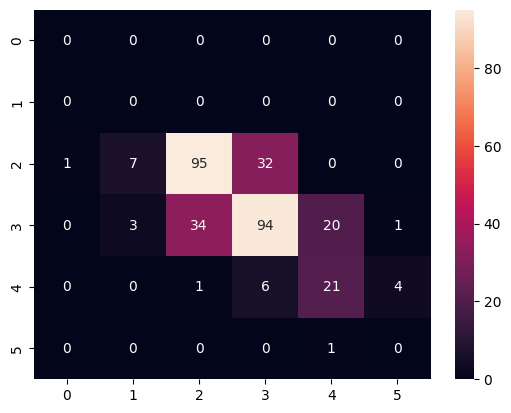

In [116]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn

predictions = rf.predict(test_features)

conf_matrix = confusion_matrix(predictions, test_labels)
seaborn.heatmap(conf_matrix, annot=True)

In [126]:
print(classification_report(predictions, test_labels, zero_division=True))

              precision    recall  f1-score   support

           3       0.00      1.00      0.00         0
           4       0.00      1.00      0.00         0
           5       0.73      0.70      0.72       135
           6       0.71      0.62      0.66       152
           7       0.50      0.66      0.57        32
           8       0.00      0.00      0.00         1

    accuracy                           0.66       320
   macro avg       0.32      0.66      0.32       320
weighted avg       0.70      0.66      0.67       320



## Cross Validation

In [118]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [119]:
FOLD = 5
ITERATIONS = 10

# X = features.copy()
X = norm_features.copy()
# X = zscore_features.copy()
y = labels.copy()

In [120]:
# define the model
model = RandomForestClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=FOLD, n_repeats=ITERATIONS, random_state=RANDOM_SEED)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=FOLD, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.695 (0.020)
